# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [92]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [93]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [102]:
#  1. Get the total rides for each city type
total_rides_df = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_df.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [114]:
# 2. Get the total drivers for each city type
# Was getting numbers not in line with the modules challenge, after googling I changed which data sheet I am accessing
total_drivers_df = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_df.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [115]:
#  3. Get the total amount of fares for each city type
total_fares_df = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_df.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [116]:
#  4. Get the average fare per ride for each city type. 
#avg_fare_per_ride_df = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df.groupby(['type']).count()['ride_id'] 
avg_fare_per_ride_df = total_fares_df / total_rides_df
avg_fare_per_ride.head()


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [117]:
# 5. Get the average fare per driver for each city type. 
#avg_fare_per_driver_df = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df.groupby(['type']).count()['driver_count']
avg_fare_per_driver = total_fares_df / total_drivers_df
avg_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [118]:
#  6. Create a PyBer summary DataFrame. 
#total_rides_df.describe()
#total_drivers_df.describe()
#total_fares_df.describe()
#avg_fare_per_ride_df.describe()
#avg_fare_per_driver_df.describe()
pyber_summary_df = pd.DataFrame({'type': ['Rural', 'Suburban', 'Urban'],
                                 'Total Rides': [total_rides_df["Rural"], total_rides_df["Suburban"], total_rides_df["Urban"]],
                                 'Total Drivers': [total_drivers_df["Rural"], total_drivers_df["Suburban"], total_drivers_df["Urban"]],
                                 'Total Fares': [total_fares_df["Rural"], total_fares_df["Suburban"], total_fares_df["Urban"]],
                                 'Average Fare per Ride': [avg_fare_per_ride["Rural"], avg_fare_per_ride["Suburban"], avg_fare_per_ride["Urban"]],
                                 'Average Fare per Driver': [avg_fare_per_driver["Rural"], avg_fare_per_driver["Suburban"], avg_fare_per_driver["Urban"]]})
pyber_summary_df.head()    

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [119]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [120]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df.head()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,"$4,327.93",$34.62,$55.49
1,Suburban,625,490,"$19,356.33",$30.97,$39.50
2,Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [123]:
# 1. Read the merged DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
pyber_data_df = pd.merge(city_data_df, ride_data_df, how ='left', on =['city','city'])
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [122]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_per_date_df = pyber_data_df.groupby(['type', 'date']).sum()['fare']
sum_of_fares_per_date_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [126]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares_per_date_df = sum_of_fares_per_date_df.reset_index()
sum_of_fares_per_date_df.head()

,level_0,index,type,date,fare
0,0,0,Rural,2019-01-01 09:45:36,43.69
1,1,1,Rural,2019-01-02 11:18:32,52.12
2,2,2,Rural,2019-01-03 19:51:01,19.90
3,3,3,Rural,2019-01-04 03:31:26,24.88
4,4,4,Rural,2019-01-06 07:38:40,47.33


In [129]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_of_fares_per_date_pivot = sum_of_fares_per_date_df.pivot(index='date', columns='type', values='fare')
#sum_of_fares_per_date_pivot.head()
sum_of_fares_per_date_pivot.tail()

type,Rural,Suburban,Urban
date,,,
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77
2019-05-08 13:10:18,NaN,NaN,18.04


In [130]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_date_fare_df = sum_of_fares_per_date_pivot.loc['2019-01-01':'2019-04-28']
new_date_fare_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [132]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_date_fare_df.index = pd.to_datetime(new_date_fare_df.index)
new_date_fare_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [133]:
# 7. Check that the datatype for the index is datetime using df.info()
new_date_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [136]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_sum_of_fares_df = new_date_fare_df.resample('W').sum()
weekly_sum_of_fares_df.head(15)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


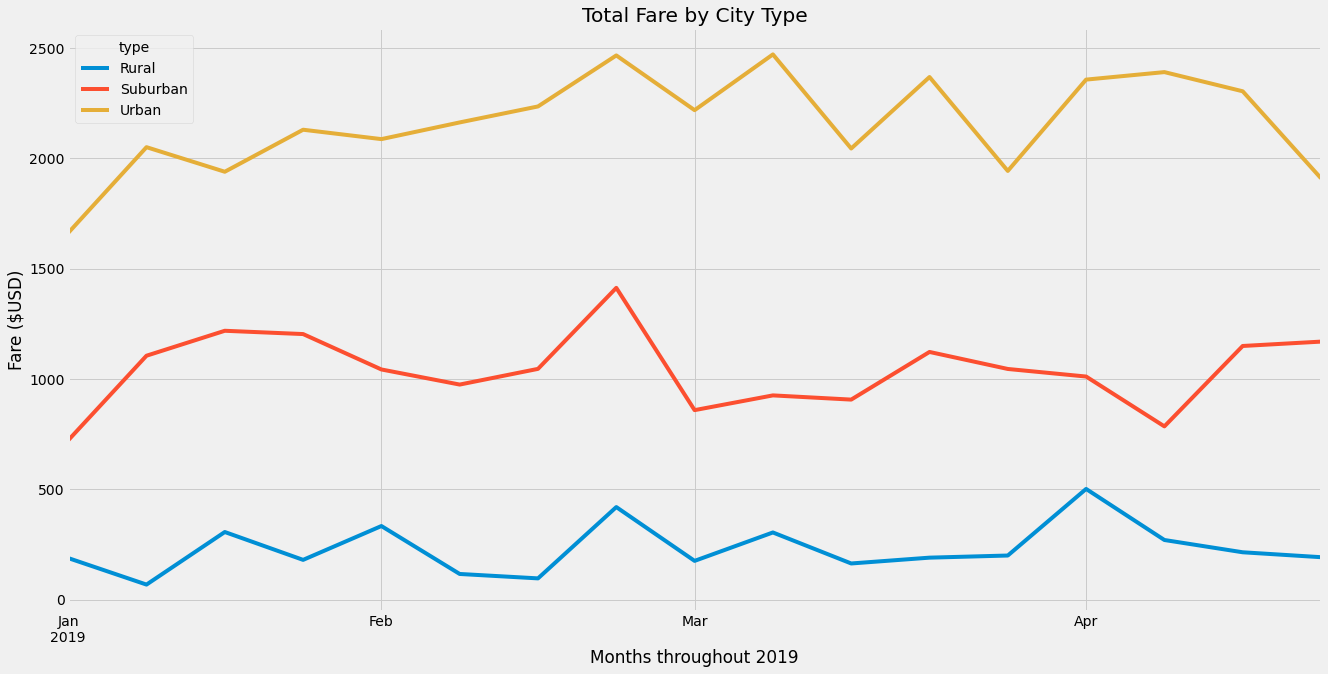

In [139]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
ax = weekly_sum_of_fares_df.plot(figsize=(20,10))
ax.plot()
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('Months throughout 2019')
style.use('fivethirtyeight')
plt.savefig('analysis/PyBer_fare_summary.png')
plt.show()

